# Indicadores de Energia

### Consumo de Energia em kWh - Comerc



Executando warmUpExercise...
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


Saving ex1data2.txt to ex1data2.txt
Saving ex1data1.txt to ex1data1.txt


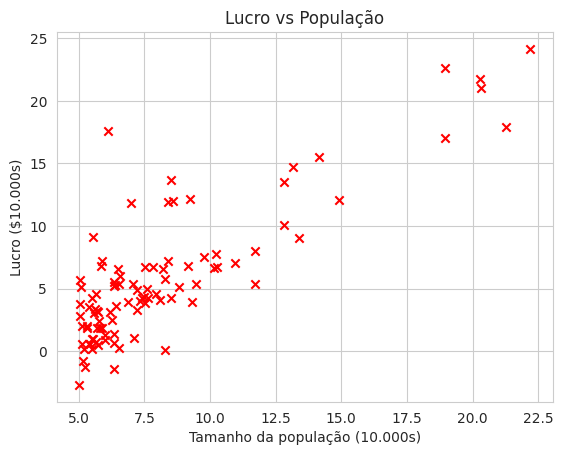


Testando a função de custo...
Com theta = [0, 0], custo = 32.072733877455676

Theta encontrado via gradiente descendente: [-3.63029144  1.16636235]


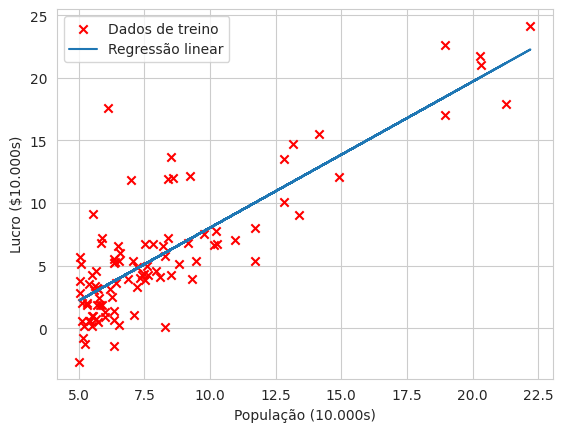

Previsão de lucro para população 35.000: $4519.77
Previsão de lucro para população 70.000: $45342.45


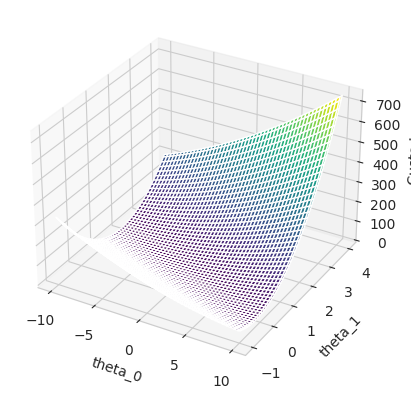

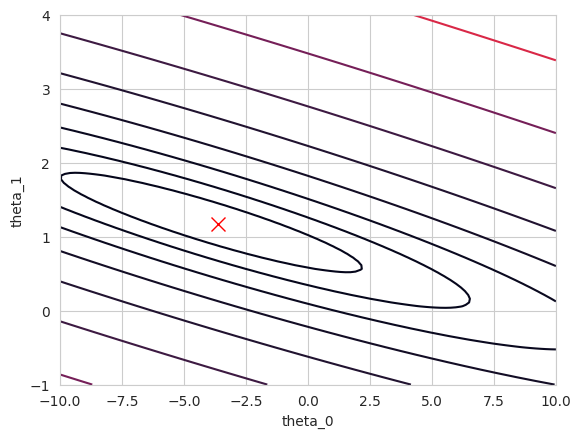


Carregando dados para múltiplas variáveis...


Saving ex1data2.txt to ex1data2 (1).txt
Primeiros 10 exemplos do dataset:
x = [2104.    3.], y = 399900.0
x = [1600.    3.], y = 329900.0
x = [2400.    3.], y = 369000.0
x = [1416.    2.], y = 232000.0
x = [3000.    4.], y = 539900.0
x = [1985.    4.], y = 299900.0
x = [1534.    3.], y = 314900.0
x = [1427.    3.], y = 198999.0
x = [1380.    3.], y = 212000.0
x = [1494.    3.], y = 242500.0
Normalizando características...
Executando gradiente descendente com múltiplas variáveis...


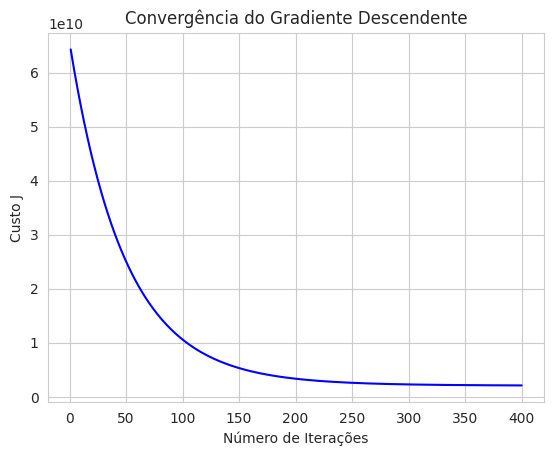

Theta encontrado: [334302.06399328  99411.44947359   3267.01285407]
Preço previsto para casa de 1650 pés² e 3 quartos: $ 289221.55

Calculando com equações normais...
Theta calculado pelas equações normais: [89597.90954355   139.21067402 -8738.01911255]
Preço previsto com equações normais para casa de 1650 pés² e 3 quartos: $ 293081.46


In [ ]:

# Regressão Linear - Atividade

# Importando bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

# ----------- Warm-up -----------
def warmUpExercise():
    return np.eye(5)

print("Executando warmUpExercise...")
print(warmUpExercise())

# ----------- Carregando os dados -----------
from google.colab import files

uploaded = files.upload()
data = np.loadtxt('ex1data1.txt', delimiter=',')
X = data[:, 0]
y = data[:, 1]
m = len(y)

# ----------- Plotando os dados -----------
def plotData(X, y):
    plt.figure()
    plt.scatter(X, y, marker='x', c='r')
    plt.xlabel('Tamanho da população (10.000s)')
    plt.ylabel('Lucro ($10.000s)')
    plt.title('Lucro vs População')
    plt.grid(True)
    plt.show()

plotData(X, y)

# ----------- Função de Custo -----------
def computeCost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    sq_errors = (predictions - y) ** 2
    J = (1 / (2 * m)) * np.sum(sq_errors)
    return J

# ----------- Gradiente Descendente -----------
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        error = (X @ theta) - y
        gradient = (alpha / m) * (X.T @ error)
        theta -= gradient
    return theta

X_with_intercept = np.column_stack((np.ones(m), X))
theta = np.zeros(2)
iterations = 1500
alpha = 0.01

print("\nTestando a função de custo...")
print("Com theta = [0, 0], custo =", computeCost(X_with_intercept, y, theta))

theta = gradientDescent(X_with_intercept, y, theta, alpha, iterations)
print("\nTheta encontrado via gradiente descendente:", theta)

plt.scatter(X, y, marker='x', c='r', label='Dados de treino')
plt.plot(X, X_with_intercept @ theta, label='Regressão linear')
plt.xlabel('População (10.000s)')
plt.ylabel('Lucro ($10.000s)')
plt.legend()
plt.grid(True)
plt.show()

pop1 = np.array([1, 3.5])
pop2 = np.array([1, 7.0])
print(f"Previsão de lucro para população 35.000: ${pop1 @ theta * 10000:.2f}")
print(f"Previsão de lucro para população 70.000: ${pop2 @ theta * 10000:.2f}")

# ----------- Visualizando a função de custo -----------
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = computeCost(X_with_intercept, y, t)

J_vals = J_vals.T
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, J_vals, cmap='viridis')
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('Custo J')
plt.show()

plt.contour(T0, T1, J_vals, levels=np.logspace(-2, 3, 20))
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2)
plt.grid(True)
plt.show()

# ----------- Regressão com Múltiplas Variáveis -----------

print("\nCarregando dados para múltiplas variáveis...")
files.upload()
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = len(y)

print("Primeiros 10 exemplos do dataset:")
for i in range(10):
    print(f"x = {X[i]}, y = {y[i]}")

# Normalização

def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

print("Normalizando características...")
X, mu, sigma = featureNormalize(X)
X = np.column_stack((np.ones(m), X))

# Custo e Gradiente para múltiplas variáveis

def computeCostMulti(X, y, theta):
    m = len(y)
    predictions = X @ theta
    sq_errors = (predictions - y) ** 2
    J = (1 / (2 * m)) * np.sum(sq_errors)
    return J

def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    for _ in range(num_iters):
        theta -= (alpha / m) * (X.T @ ((X @ theta) - y))
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

alpha = 0.01
num_iters = 400
theta = np.zeros(X.shape[1])

print("Executando gradiente descendente com múltiplas variáveis...")
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

plt.plot(range(1, len(J_history) + 1), J_history, '-b')
plt.xlabel('Número de Iterações')
plt.ylabel('Custo J')
plt.title('Convergência do Gradiente Descendente')
plt.grid(True)
plt.show()

print("Theta encontrado:", theta)

# Previsão para uma casa de 1650 sq-ft e 3 quartos
input_features = np.array([1650, 3])
norm_features = (input_features - mu) / sigma
norm_features = np.insert(norm_features, 0, 1)
price = norm_features @ theta
print(f"Preço previsto para casa de 1650 pés² e 3 quartos: $ {price:.2f}")

# ----------- Equações Normais -----------
def normalEqn(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y

print("\nCalculando com equações normais...")
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]
X = np.column_stack((np.ones(len(y)), X))

theta = normalEqn(X, y)
print("Theta calculado pelas equações normais:", theta)

price = np.array([1, 1650, 3]) @ theta
print(f"Preço previsto com equações normais para casa de 1650 pés² e 3 quartos: $ {price:.2f}")


